In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("/content/decline_count.csv")
df

,Time,Decline_count,Total_Count,Decline_percentage
0,27-01-2017 18:42,36,654,6%
1,27-01-2017 18:43,14,522,3%
2,27-01-2017 18:44,7,348,2%
3,27-01-2017 18:45,18,725,2%
4,27-01-2017 18:46,16,72,22%
...,...,...,...,...
965,28-01-2017 10:47,29,285,10%
966,28-01-2017 10:48,10,558,2%
967,28-01-2017 10:49,11,268,4%
968,28-01-2017 10:50,3,645,0%


In [9]:
import matplotlib.pyplot as plt

<ipython-input-19-1c451e976f4a>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Time'] = pd.to_datetime(df['Time'])


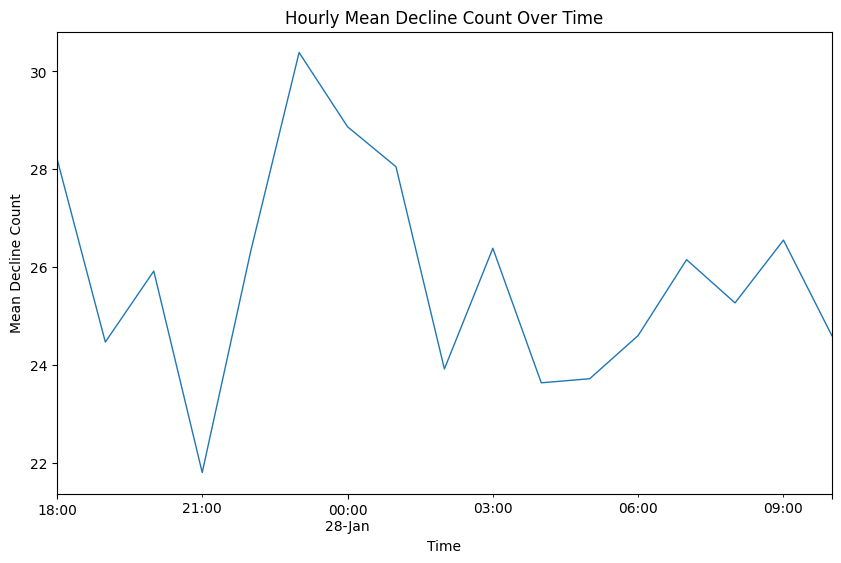

In [19]:


# Step 1: Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Step 2: Set 'Time' column as the index
df.set_index('Time', inplace=True)

# Step 3: Plot 'Decline_count' over 'Time'
plt.figure(figsize=(10, 6))
# Resampling to hourly data, taking the mean decline count in each hour
df['Decline_count'].resample('H').mean().plot(title='Hourly Mean Decline Count Over Time', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Mean Decline Count')
plt.show()



<ipython-input-23-e961e70145ef>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Time'] = pd.to_datetime(df['Time'])


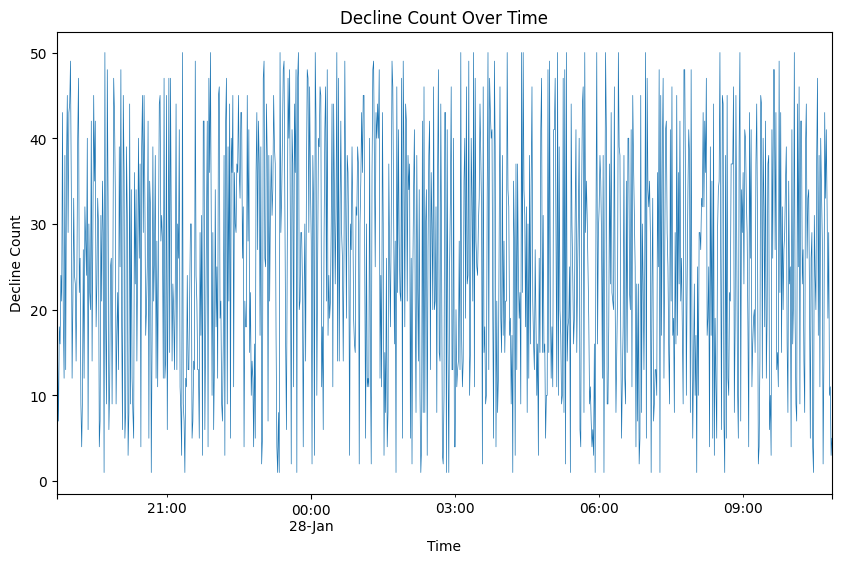

In [23]:


# Step 1: Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Step 2: Set 'Time' column as the index
df.set_index('Time', inplace=True)

# Step 3: Plot 'Decline_count' over 'Time'
plt.figure(figsize=(10, 6))
df['Decline_count'].plot(title='Decline Count Over Time', linewidth=0.5)  # Making the line thinner
plt.xlabel('Time')
plt.ylabel('Decline Count')
plt.show()

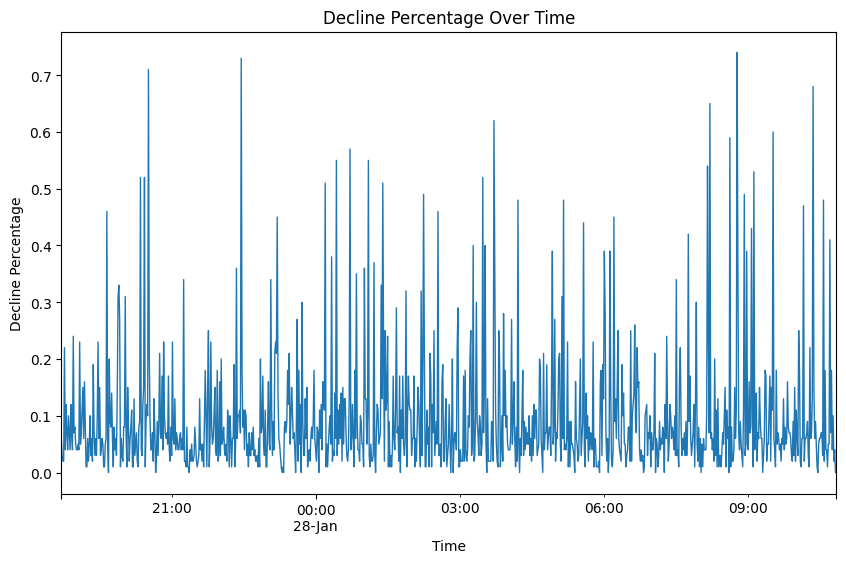

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already read and 'Time' has been set as the index

# Step 1: Convert 'Decline_percentage' to a numeric type
df['Decline_percentage'] = df['Decline_percentage'].str.rstrip('%').astype('float') / 100.0

# Optional: Filter the DataFrame for a specific time interval, e.g., 'YYYY-MM-DD HH:MM' format
# Adjust the start_time and end_time to your desired time interval
start_time = '27-01-2017  18:42:00'
end_time = '28-01-2017  10:51:00'
filtered_df = df[start_time:end_time]

# Step 3: Plot 'Decline_percentage' over time
plt.figure(figsize=(10, 6))
filtered_df['Decline_percentage'].plot(title='Decline Percentage Over Time', linewidth=1)
plt.xlabel('Time')  # 'Time' is the index, so it's automatically used
plt.ylabel('Decline Percentage')
plt.show()


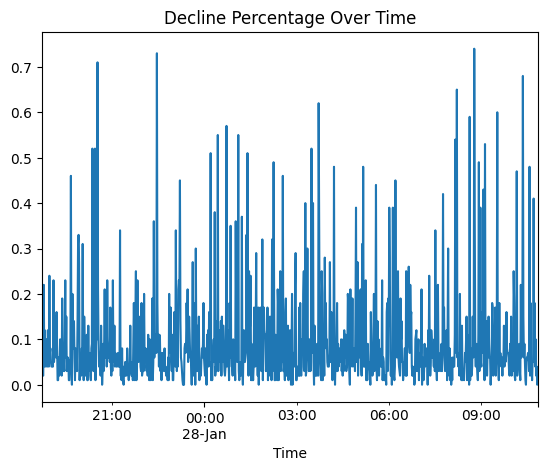

In [25]:
# Step 1: Visualize the Data
df['Decline_percentage'].plot(title='Decline Percentage Over Time')
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

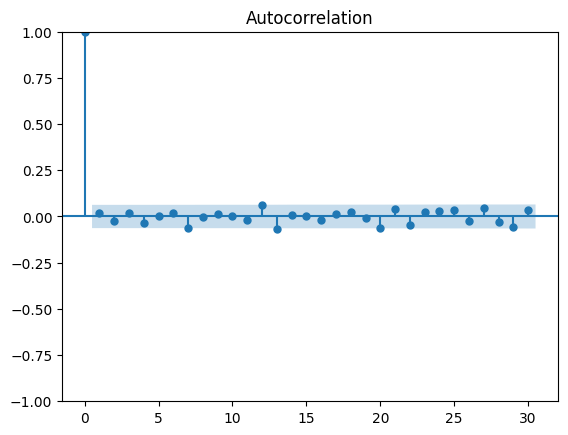

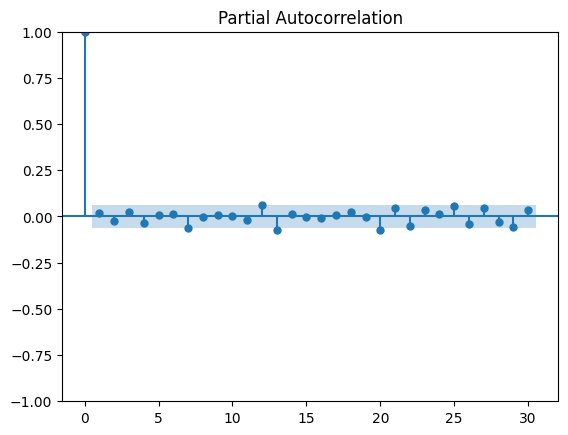

In [28]:
# Plot ACF and PACF plots to help determine the p, d, q parameters
plot_acf(df['Decline_percentage'])
plot_pacf(df['Decline_percentage'])
plt.show()

In [29]:
# Split the data into train and test for validation
train_data, test_data = df['Decline_percentage'][:int(len(df)*0.8)], df['Decline_percentage'][int(len(df)*0.8):]


In [31]:
# These plots are for demonstration. You'll need to interpret these to choose p, d, q
p = 1  # Example value
d = 1  # Differencing order, if the series was not stationary and you needed to difference it
q = 1  # Example value

In [32]:
# Step 5: Build and Fit the ARIMA Model
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [33]:
# Step 6: Evaluate Model Performance
predictions = model_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, predictions)
print(f'Test MSE: {mse}')

Test MSE: 0.018099840582542485


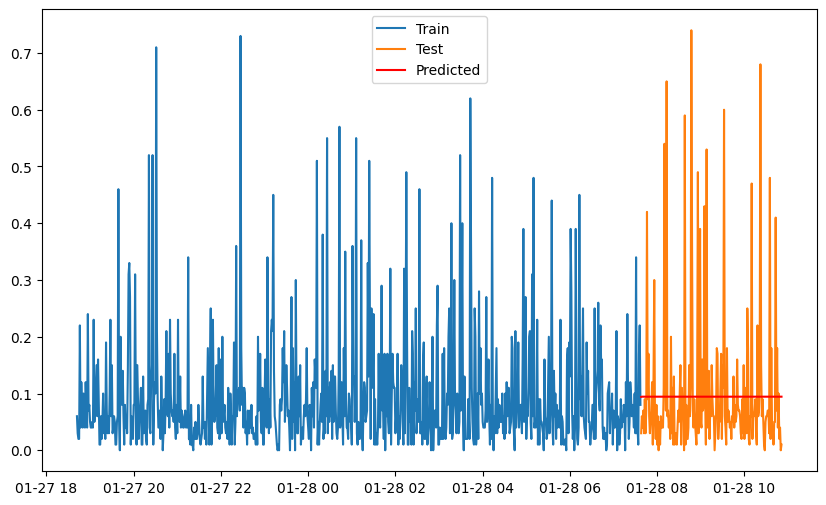

In [34]:
# Step 7: Forecast and Plot
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [57]:
from pandas.tseries.offsets import DateOffset

# Example: Forecasting for a specific future date
target_date = pd.Timestamp('16-03-2024 03:25')  # Change this to your target date

# Calculate the number of steps from the last date in your dataset to the target date
last_date = df.index[-1]
#delta = target_date - last_date  # This is a Timedelta object

# Assuming daily frequency, extract the number of days from delta to get steps ahead
#steps_ahead = delta.days

# Forecast
forecast = model_fit.forecast(steps=1)

# Since forecast will return a series of forecasts up to the target_date,
# you can try to access the last value directly for your forecast_on_target.
# However, if the direct indexing doesn't match because forecast results don't directly index by date,
# you would take the last value as your target forecast:
forecast_on_target = forecast.iloc[-1]

print(f"Forecasted Decline Percentage on {target_date.date()}: {forecast_on_target:.2f}%")


Forecasted Decline Percentage on 2024-03-16: 0.09%


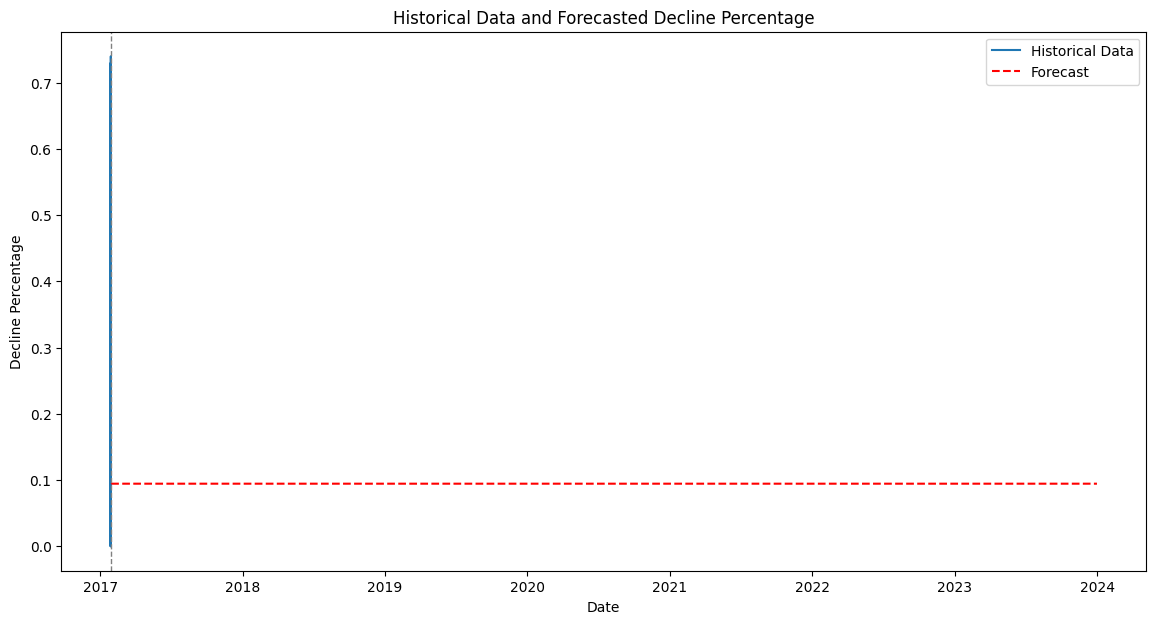

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `model_fit` is your fitted ARIMA model
# and `target_date` is the pd.Timestamp object for your target date

# Step 1: Forecast
steps_ahead = (target_date - df.index[-1]).days
forecast = model_fit.forecast(steps=steps_ahead)

# Step 2: Create a time series for the forecast
# Start from the day after the last date in the original dataset
forecast_start_date = df.index[-1] + pd.Timedelta(days=1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=len(forecast), freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_dates)

# Step 3: Concatenate the historical and forecasted data
combined_series = pd.concat([df['Decline_percentage'], forecast_series])

# Step 4: Plot the combined data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Decline_percentage'], label='Historical Data')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red', linestyle='--')
plt.axvline(x=df.index[-1], color='grey', linestyle='--', linewidth=1)  # Distinguishes between historical and forecasted data
plt.legend()
plt.title('Historical Data and Forecasted Decline Percentage')
plt.xlabel('Date')
plt.ylabel('Decline Percentage')
plt.show()


With the data prepared and assuming an MSE of 0.018099840582542485 from a model trained on this data:


**Relative Error**: Given that the Decline_percentage values range widely (from 0% to values as high as 73% in your dataset), an MSE of 0.0181 (or 1.81% when thinking in percentage terms) seems relatively small. This suggests that, on average, the model's predictions are quite close to the actual values.


**Data Variability**: The dataset shows significant variability, with Decline_percentage ranging from 0% to over 70%. The MSE should be considered in light of this variability. A small MSE suggests that the model is capable of capturing the underlying patterns in the data despite its wide range.


**Model Evaluation:** It's essential to compare this MSE with those from other models or benchmarks to fully evaluate its performance. If this MSE represents a significant improvement over simpler models or benchmarks, it indicates a strong model performance for your specific task.

Remember, the ultimate measure of "good" or "bad" depends on the specific requirements of your application, including how the predictions are used and the cost of inaccuracies. For a more detailed evaluation, consider additional metrics (MAE, RMSE, MAPE) and qualitative assessments (model interpretability, operational costs, etc.).
